<a href="https://colab.research.google.com/github/fediltf/Sentiment-Analyzer/blob/main/Sentiment_Analysis_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Setup**

## 1.1 Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## 1.2 Importing amazon-fine-food-reviews Dataset

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d snap/amazon-fine-food-reviews
!unzip /content/amazon-fine-food-reviews.zip -d /content/amazon-fine-food-reviews

 98% 237M/242M [00:01<00:00, 193MB/s]
100% 242M/242M [00:01<00:00, 159MB/s]
Archive:  /content/amazon-fine-food-reviews.zip
  inflating: /content/amazon-fine-food-reviews/Reviews.csv  
  inflating: /content/amazon-fine-food-reviews/database.sqlite  
  inflating: /content/amazon-fine-food-reviews/hashes.txt  


# 2. Data Preprocessing + NLTK Basics

In [ ]:
df = pd.read_csv('/content/amazon-fine-food-reviews/Reviews.csv')

In [ ]:
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


In [ ]:
df.shape

(568454, 10)

In [ ]:
#Reducing dataset size
df=df[500:1000]
df.shape

(500, 10)

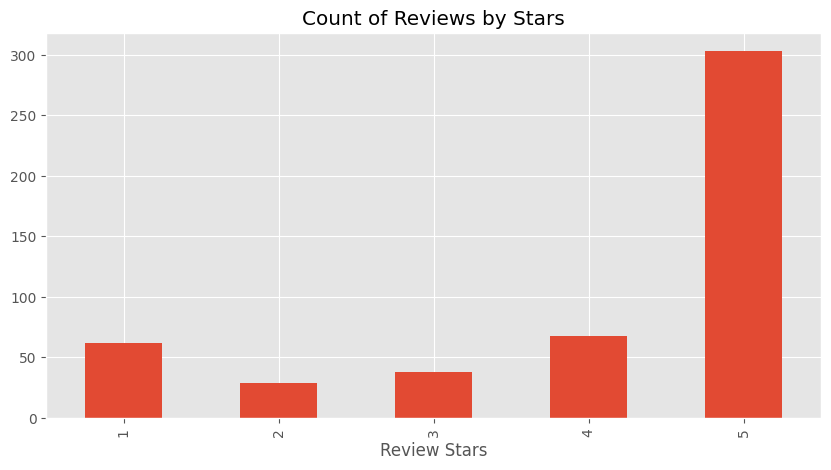

In [ ]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
example= df['Text'][950]
print(example)

Sent this basket to my father for his birthday.  He said the fruit was very fresh and sweet.  Happy with this healthy purchase!


In [ ]:
tokens = nltk.word_tokenize(example)
print(tokens[:10])

['Sent', 'this', 'basket', 'to', 'my', 'father', 'for', 'his', 'birthday', '.']


[Part-of-speech tag sets](https://www.ibm.com/docs/en/wca/3.5.0?topic=analytics-part-speech-tag-sets)

In [ ]:
tagged = nltk.pos_tag(tokens)
print(tagged[:10])

[('Sent', 'NNP'), ('this', 'DT'), ('basket', 'NN'), ('to', 'TO'), ('my', 'PRP$'), ('father', 'NN'), ('for', 'IN'), ('his', 'PRP$'), ('birthday', 'NN'), ('.', '.')]


In [ ]:
ent = nltk.chunk.ne_chunk(tagged)
ent.pprint()

(S
  Sent/NNP
  this/DT
  basket/NN
  to/TO
  my/PRP$
  father/NN
  for/IN
  his/PRP$
  birthday/NN
  ./.
  He/PRP
  said/VBD
  the/DT
  fruit/NN
  was/VBD
  very/RB
  fresh/JJ
  and/CC
  sweet/JJ
  ./.
  Happy/JJ
  with/IN
  this/DT
  healthy/JJ
  purchase/NN
  !/.)


# 3. VADER Sentiment Scoring
*Valence Aware Dictionary and sEntiment Reasoner*

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #provides progress bar for loops and iterables.

sia = SentimentIntensityAnalyzer() #sia object

In [ ]:
sia.polarity_scores("i am not so sad with this")

{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.4962}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.9109}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(),total= len(df)):
  text = row['Text']
  Id = row['Id']
  res[Id]= sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
vaders= pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head(5)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,501,0.067,0.887,0.046,-0.2003,B000G6RYNE,A2LGWBIT9WCTVA,D. Gesswein,0,0,5,1173312000,Excellent chip!,I bought these for the office and no one can p...
1,502,0.000,0.620,0.380,0.8922,B000G6RYNE,A3TX8RH943OLBM,annie,3,5,2,1214006400,salt and vinegar chips,It was a great value and I like the package si...
2,503,0.000,0.715,0.285,0.8213,B000G6RYNE,A3L4OZ0U0A5UDH,Linda Mullings,1,2,5,1349136000,Delicious!!,Perfect!! They are my favorite because I can s...
3,504,0.082,0.753,0.165,0.7866,B000G6RYNE,A2OEUROGZDTXUJ,J. Graves,1,2,4,1327968000,I like them.,"Amazon's suggestion for a 4 star review is ""I ..."
4,505,0.016,0.816,0.168,0.9062,B000G6RYNE,A30H2335OM7RD6,"apoem ""apoem""",1,2,5,1316649600,Love Kettle Chips,These are a favorite at our home. We like the ...


In [ ]:
import warnings

# Suppress FutureWarnings and UserWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

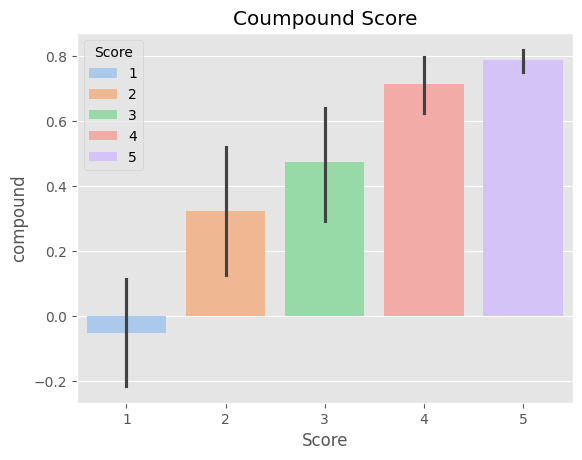

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='compound', hue="Score", palette=sns.color_palette("pastel"))
ax.set_title('Coumpound Score')
plt.show()

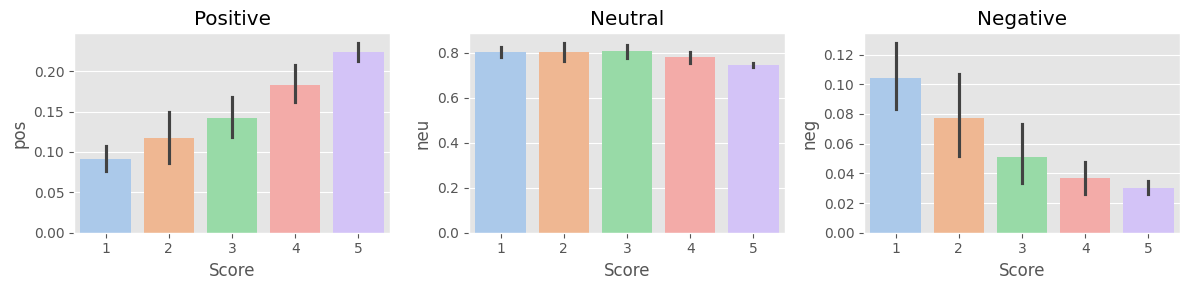

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0], palette=sns.color_palette("pastel"))
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1], palette=sns.color_palette("pastel"))
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2], palette=sns.color_palette("pastel"))
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# **3. RoBERTa Pretrained Model**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
print(example)
print(polarity_scores_roberta(example))

Sent this basket to my father for his birthday.  He said the fruit was very fresh and sweet.  Happy with this healthy purchase!
{'roberta_neg': 0.00091216015, 'roberta_neu': 0.012162518, 'roberta_pos': 0.98692536}


In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

# **4. VADER vs RoBERTa**

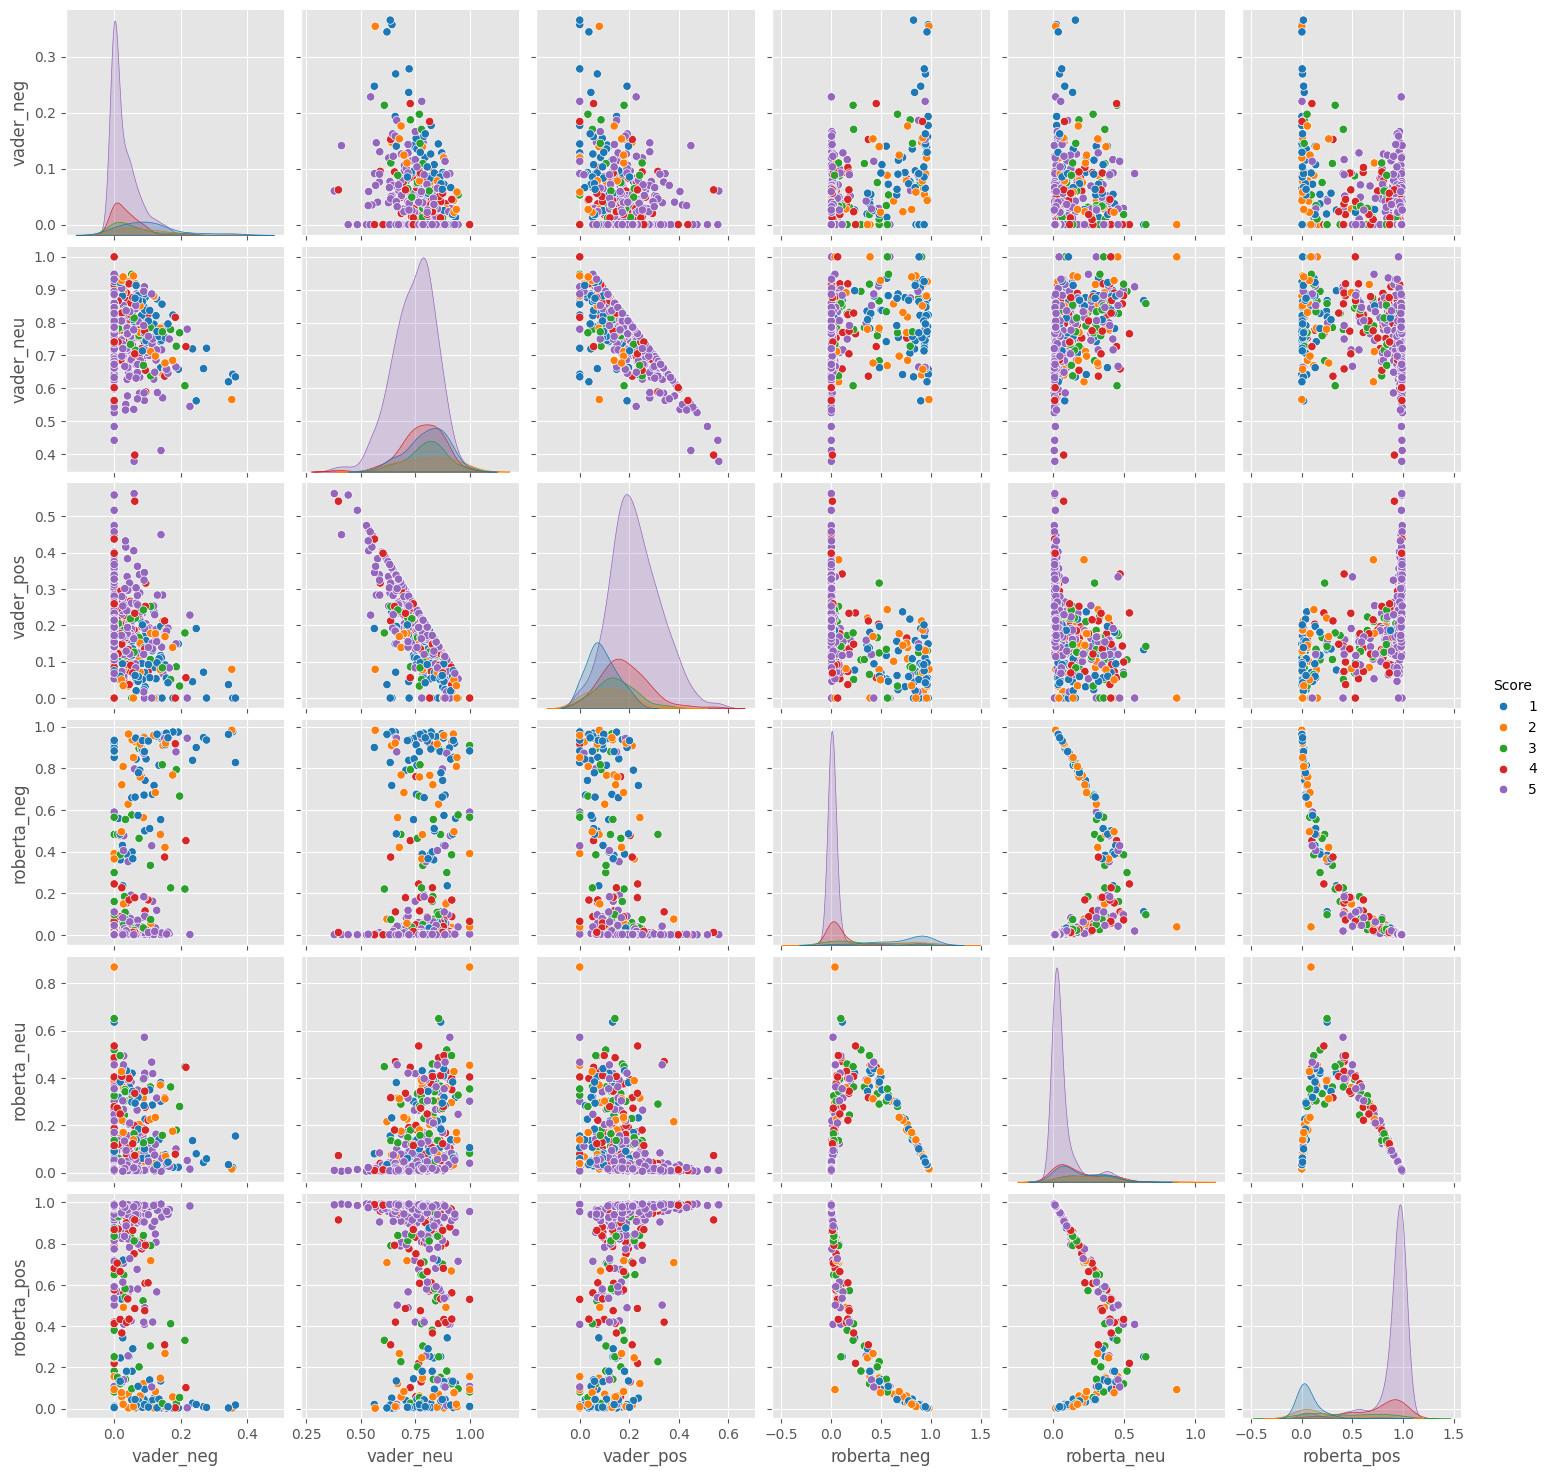

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

# **5. Reviews**

## Positive 1★ Reviews

In [ ]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [ ]:
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'Kettle chips now look, feel and taste like Lays.  These chips used to be my favorite when it was crinkle cut and hefty.  Now, no longer my favorite.'

## Negative 5★ Reviews

In [ ]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

"If this flavor lasted longer than it does, I'd probably die of starvation for lack of wanting to take it out of my mouth."

In [ ]:
results_df.query('Score == 1').sort_values('vader_neg', ascending=False)['Text'].values[0]

'The laddoos turned bad in a few days after we received it. No other item inside our fridge turned bad.'

# **6. The Transformers Pipeline**

In [ ]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
sent_pipeline(example)

[{'label': 'POSITIVE', 'score': 0.9998761415481567}]